<a href="https://colab.research.google.com/github/Noahkandie/Autolib-Hypothesis-Testing-WK4-IP/blob/main/Autolib_Hypothesis_Testing_WK4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question



We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

To work on this project, we will perform the following analysis with Python:
   1. Find and deal with outliers, anomalies, and missing data within the dataset.
   2.  Plot appropriate univariate and bivariate summaries recording our observations.
   3.  Implement the solution by performing hypothesis testing.
   
The data set I am working with is the Autolib dataset that is produced on the Moringa School LMS. It contains information concerning 3 brands of electric cars belonging to the Autolib company: the Bluecar, the Utilib, and the Utilib 14.

## Problem Statement

To investigate whether there is a viable difference between Bluecar usage on different day types i.e. weekdays or weekend

## Hypothesis

The null hypothesis I will test is that the mean of the number of Bluecars cars taken on the weekdays is equal to that of the Bluecars taken on the week, i.e., there is no difference between the two means.

μ₁: mean number of bluecars taken during normal weekdays

μ₂: mean number of bluecars taken during the weekends

Null and Alternative hypothesis

Ho: μ₁ = μ₂

H1: μ₁ ≠ μ₂ 

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [2]:
# Load the dataset and preview
df=pd.read_csv('/content/autolib_daily_events_postal_code.csv')
df[:5]

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
# Data description
col_describe=pd.read_excel('/content/columns_explanation.xlsx')
col_describe

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [4]:
# Check data info, null values and datatypes
df.info()

# The dataset has 13 columns and 16085 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [5]:
# Data descriptive statistics
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [6]:
# Check for unique values 
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

# Data Cleaning

In [7]:
# Check for missing values
df.isnull().count()

# no null values

Postal code               16085
date                      16085
n_daily_data_points       16085
dayOfWeek                 16085
day_type                  16085
BlueCars_taken_sum        16085
BlueCars_returned_sum     16085
Utilib_taken_sum          16085
Utilib_returned_sum       16085
Utilib_14_taken_sum       16085
Utilib_14_returned_sum    16085
Slots_freed_sum           16085
Slots_taken_sum           16085
dtype: int64

In [8]:
# Check for duplicates and drop any duplicates in the dataset
df.duplicated().value_counts()
# No duplicates

False    16085
dtype: int64

In [9]:
# change column names to lower case and rename columns
df.columns = map(str.lower, df.columns)

#rename
df.columns = df.columns.str.rstrip('_sum')
df.rename(columns={'dayofweek':'day_week'},inplace=True)
df.columns

Index(['postal code', 'date', 'n_daily_data_point', 'day_week', 'day_type',
       'bluecars_taken', 'bluecars_returned', 'utilib_taken',
       'utilib_returned', 'utilib_14_taken', 'utilib_14_returned',
       'slots_freed', 'slots_taken'],
      dtype='object')

In [10]:
# Drop unneeded columns
df.drop(columns=['postal code','n_daily_data_point','utilib_taken', 'utilib_returned',
       'utilib_14_taken', 'utilib_14_returned', 'slots_freed', 'slots_taken'],inplace=True)
df

,date,day_week,day_type,bluecars_taken,bluecars_returned
0,1/1/2018,0,weekday,110,103
1,1/2/2018,1,weekday,98,94
2,1/3/2018,2,weekday,138,139
3,1/4/2018,3,weekday,104,104
4,1/5/2018,4,weekday,114,117
...,...,...,...,...,...
16080,6/15/2018,4,weekday,15,10
16081,6/16/2018,5,weekend,19,19
16082,6/17/2018,6,weekend,33,35
16083,6/18/2018,0,weekday,11,14


In [11]:
# Change date column into datetime data type
df['date']=pd.to_datetime(df['date'])
df['day_week']=df['day_week'].astype(str)
df.info()
# Shape is (16085 rows, 6 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               16085 non-null  datetime64[ns]
 1   day_week           16085 non-null  object        
 2   day_type           16085 non-null  object        
 3   bluecars_taken     16085 non-null  int64         
 4   bluecars_returned  16085 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 628.4+ KB


Text(0.5, 1.0, 'Boxplot of Bluecars taken & Bluecars returned')

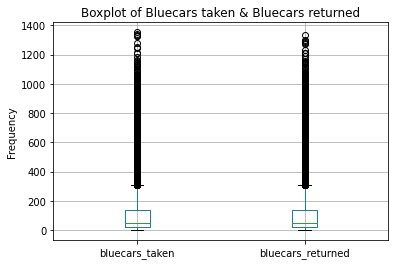

In [12]:
# Checking for outliers

df.boxplot()
plt.ylabel('Frequency')
plt.title('Boxplot of Bluecars taken & Bluecars returned')

In [13]:
# remove outliers if any are present using the interquartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df[['bluecars_taken','bluecars_returned']]= df[['bluecars_taken','bluecars_returned']][~((df[['bluecars_taken','bluecars_returned']] < (Q1 - 1.5 * IQR)) |(df[['bluecars_taken','bluecars_returned']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
df.isnull().value_counts()
# drop null values
df.dropna(axis=0,inplace=True)

df.shape

(13826, 5)

In [15]:
df

,date,day_week,day_type,bluecars_taken,bluecars_returned
0,2018-01-01,0,weekday,110.0,103.0
1,2018-01-02,1,weekday,98.0,94.0
2,2018-01-03,2,weekday,138.0,139.0
3,2018-01-04,3,weekday,104.0,104.0
4,2018-01-05,4,weekday,114.0,117.0
...,...,...,...,...,...
16080,2018-06-15,4,weekday,15.0,10.0
16081,2018-06-16,5,weekend,19.0,19.0
16082,2018-06-17,6,weekend,33.0,35.0
16083,2018-06-18,0,weekday,11.0,14.0


# Exploratory Analysis


## Univariate Analysis

In [16]:
# Check Means of central tendency (mean, median, mode)
# Blue car
bluecar=df[['bluecars_taken','bluecars_returned']]
bluecar.describe()

,bluecars_taken,bluecars_returned
count,13826.000000,13826.000000
mean,61.078403,61.027846
std,65.248846,64.960126
min,0.000000,0.000000
25%,17.000000,17.000000
50%,37.000000,37.000000
75%,80.000000,80.000000
max,307.000000,306.000000


In [17]:
# Quartiles, interquartile range
quantiles = df.quantile([0.25,0.5,0.75])
print(quantiles)

      bluecars_taken  bluecars_returned
0.25            17.0               17.0
0.50            37.0               37.0
0.75            80.0               80.0


In [18]:
# Check for skewness and kurtosis
skew=bluecar.skew()
print('Skewness: ')
print(skew)
print('******************************')
kurt=bluecar.kurt()
print('Kurtosis: ')
print(kurt)

Skewness: 
bluecars_taken       1.791791
bluecars_returned    1.793672
dtype: float64
******************************
Kurtosis: 
bluecars_taken       2.819063
bluecars_returned    2.819947
dtype: float64


Text(0, 0.5, 'Frequency')

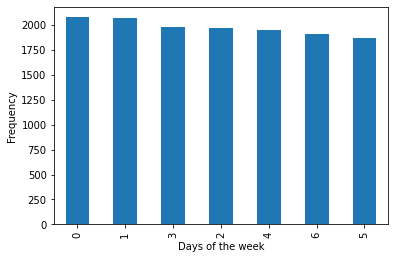

In [19]:
# Check frequency of day of the week
day=df['day_week'].value_counts()
day.plot.bar()
plt.xlabel('Days of the week')
plt.ylabel('Frequency')




   1. The number of Bluecars taken and that returned seems to have a relationship. The mean, mode and Median numbers of cars taken and those returned is practically the same.

   2. Both distributions (Bluecars taken and Bluecars returned) are highly skewed to the right.


In [20]:
# Median
df1=df.groupby('day_type')
df1.median()


,bluecars_taken,bluecars_returned
day_type,,
weekday,34.0,35.0
weekend,45.0,44.0


In [21]:
# Describe data per day type. This also puts the dataset into strata
# weekend
weekend=df[df['day_type']=='weekend']
weekend.describe()

# The dataset statistics are similar between the two variables

,bluecars_taken,bluecars_returned
count,3780.000000,3780.000000
mean,65.600794,65.321693
std,62.741907,63.358368
min,0.000000,0.000000
25%,21.000000,20.000000
50%,45.000000,44.000000
75%,88.250000,88.000000
max,307.000000,306.000000


In [22]:
# weekday data

weekday=df[df['day_type']=='weekday']
weekday.describe()

,bluecars_taken,bluecars_returned
count,10046.000000,10046.000000
mean,59.376767,59.412204
std,66.090508,65.482924
min,0.000000,0.000000
25%,16.000000,16.000000
50%,34.000000,35.000000
75%,76.000000,75.000000
max,307.000000,306.000000


In [23]:
# frequency tables
df1=df.groupby('day_type')
df1.mean()


,bluecars_taken,bluecars_returned
day_type,,
weekday,59.376767,59.412204
weekend,65.600794,65.321693


In [24]:
# Standard deviation
# frequency tables
df1=df.groupby('day_type')
df1.std()

,bluecars_taken,bluecars_returned
day_type,,
weekday,66.090508,65.482924
weekend,62.741907,63.358368


The mean of blue car usage is relatively higher during the weekend compared to the weekdays in both cars taken and returned

The standard deviation of the weekday data is slightly higher than the weekend. This means data has more variation during the weekday


## Multivariate Analysis

                   bluecars_taken  bluecars_returned
bluecars_taken           1.000000           0.995543
bluecars_returned        0.995543           1.000000


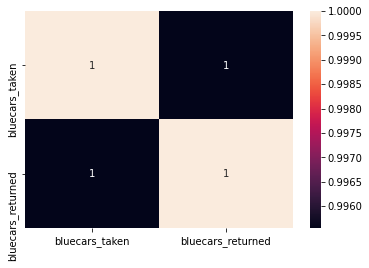

In [25]:
# Calculating correlation
corr=bluecar.corr()
print(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Text(0, 0.5, 'Bluecars returned')

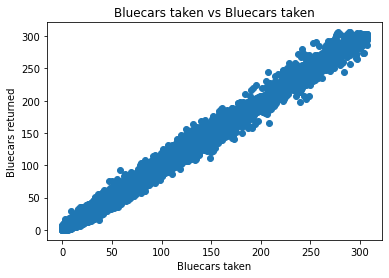

In [26]:
# Plot a scatter plot
plt.scatter(bluecar['bluecars_taken'],bluecar['bluecars_returned'],)
plt.title('Bluecars taken vs Bluecars taken')
plt.xlabel('Bluecars taken')
plt.ylabel('Bluecars returned')



The correlation coefficient of 0.995543 indicates a very strong relationship between the two variables

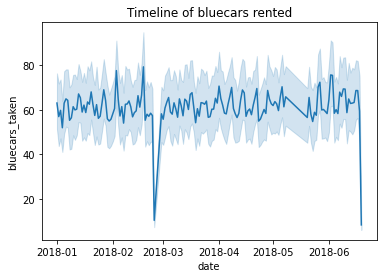

In [27]:

sns.lineplot(x='date',y='bluecars_taken',data=df)
plt.title('Timeline of bluecars rented')

plt.show()

# Hypothesis Testing


In [28]:
# Check for normality
# weekday data using The Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(weekday['bluecars_taken'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.760, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [29]:
# weekend data using D’Agostino’s K^2 Test
from scipy.stats import normaltest
stat,p=normaltest(weekend['bluecars_taken'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=1087.758, p=0.000
Sample does not look Gaussian




Since both of our datasets do not follow a normal distribution, we reject the use of all parametric tests and consider using non parametric test.

In our case we will use Wilcoxon Signed-Rank Test for two paired samples since our samples are drawn from the same population. It is used to compare two related samples, matched samples, or repeated measurements on a single sample to assess whether their population mean ranks differ

Our hypothesis as defined earlier:

Null and Alternative hypothesis

Ho: μ₁ = μ₂

H1: μ₁ ≠ μ₂ 
We will define our alpha = 0.05

Asumptions

To use Wilcoxon Signed-Rank test both dataset x and y need to have the same length and their should be atleast 20 records


In [30]:
# Assuming Beta=0.1, power = 0.9
# a larger sample size increases precision so we will use 10% of the data to calculate the Test statistic
samplesize=int(0.1*bluecar.shape[0])
samplesize

1382

In [31]:
# U

# we will use a simple random sampling to randomly select 10% of values from the population
# which is the weekend dataset
weekend_taken=weekend['bluecars_taken'].sample(1382)
weekend_taken

10512     10.0
14190    130.0
14301     53.0
250      176.0
13371     54.0
         ...  
9133      20.0
11666     21.0
10805     22.0
3992      14.0
3755      53.0
Name: bluecars_taken, Length: 1382, dtype: float64

In [32]:
weekday_taken=weekday['bluecars_taken'].sample(1382)
weekday_taken

12448    34.0
13510    38.0
10938    23.0
3225      9.0
6492     67.0
         ... 
6327     74.0
5821     61.0
12697    26.0
6088     69.0
3766     30.0
Name: bluecars_taken, Length: 1382, dtype: float64

In [33]:
# Calculate the statistic and p value
from scipy.stats import wilcoxon
# compare samples
stat, p = wilcoxon(weekday_taken, weekend_taken)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

Statistics=394272.500, p=0.000
Reject H0


Challenge the Solution

In [34]:
# use a different sample size
weekend_taken_1=weekend['bluecars_taken'].sample(100)

weekday_taken_1=weekday['bluecars_taken'].sample(100)


In [35]:
# Calculate the statistic and p value
from scipy.stats import wilcoxon
# compare samples
stat, p = wilcoxon(weekday_taken_1, weekend_taken_1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

Statistics=2304.500, p=0.552
Fail to reject H0


Interpretation of results

A wilcoxon T test was used to analyse the mean of the two strata. A sample of 1382, which represented a 10% representation of the population. We used 95% significance level to test the hypothesis.

The p value of 0 is less than alpha, 0.05. Therefore we reject the null hypothesis. This shows that the mean of the number of bluecars rented on the weekends (65.600794) differed with the mean of the number of bluecars rented on the weekdays (59.376767)

We challenge the solution using a smaller sample size. We reject H0




# Conclusion





In conclusion, the study shows significant difference between the number of cars taken during weekdays and during weekends.  

The autolib management can therefore make strategic decisions:
 1. to increase the number of cars available on weekends from this findings.
 2. increase the staff roster over the weekend compared to the weekday
 


